In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('Advertising.csv')

In [64]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [66]:
df.isnull().any()

Unnamed: 0    False
TV            False
radio         False
newspaper     False
sales         False
dtype: bool

In [67]:
df = df.drop(columns=['Unnamed: 0'])

In [68]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# basit regresiyon ile ilgilendiğimiz için sadece bir bağımsız gözlemi alıp hesaplarımızı yapacağız.
* amacımız tv reklam harcamaları ile satışı değerlendirmek

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [70]:
import seaborn as sns

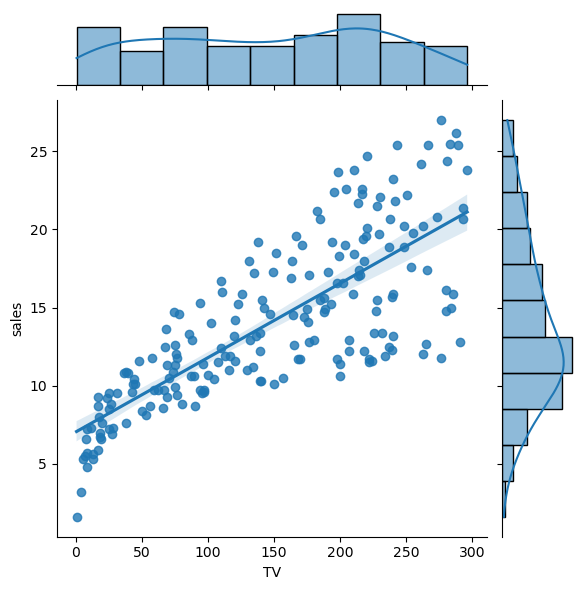

In [71]:
sns.jointplot(x=df.TV, y=df.sales, data=df, kind='reg');

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
X= df[['TV']] # bağımsız değişkenimizi X olarak kaydettik

In [74]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [75]:
y= df[['sales']]

In [76]:
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [77]:
reg = LinearRegression() # model nesnesi oluşturmak denir bu işleme.

In [78]:
model= reg.fit(X,y) # öcne bağımsız sonra bağımlı değişken

In [79]:
model

LinearRegression()

In [80]:
str(model)

'LinearRegression()'

In [81]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n

In [82]:
model.intercept_   ## $B_0  değeri$

array([7.03259355])

In [83]:
model.coef_ ## $ B_1 değeri $

array([[0.04753664]])

In [84]:
#rkare  Bağımlı değişkende ki değişikliğin, bağımsız değişkenlerce açıklanma yüzdesidir. Yani ne kadar açıklıyabiliyoruz 
model.score(X,y)
###

0.611875050850071

# Basit doğrusal regresyon tahmini

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

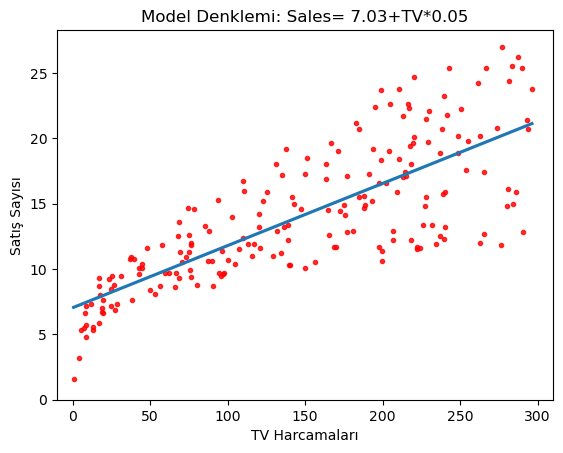

In [96]:
g = sns.regplot(data=df, x='TV', y='sales', ci=None, scatter_kws={'color': 'r','s':9}) ;
g.set_title('Model Denklemi: Sales= 7.03+TV*0.05')
g.set_ylabel('Satış Sayısı')
g.set_xlabel('TV Harcamaları')

# Grafiğin başlığını ayarla

plt.xlim(-10,310)
plt.ylim(bottom=0);

Sales=7.03+0.05 * TV

In [88]:
7.03+0.05*165

15.280000000000001

In [91]:
model.intercept_ + model.coef_*165

array([[14.87613922]])

In [97]:
model.predict([[400]])

C:\Users\ycanf\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[26.04724972]])

In [90]:
?model.predict

Signature: model.predict(X)
Docstring:
Predict using the linear model.

Parameters
----------
X : array-like or sparse matrix, shape (n_samples, n_features)
    Samples.

Returns
-------
C : array, shape (n_samples,)
    Returns predicted values.
File:      c:\users\ycanf\anaconda3\lib\site-packages\sklearn\linear_model\_base.py
Type:      method

In [92]:
yeni_veri= [[5],[15],[30]]

In [93]:
model.predict(yeni_veri)

C:\Users\ycanf\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.27027675],
       [7.74564316],
       [8.45869276]])

## Artıklar ve Makine Öğrenmesindeki Önemi
* MSE: Hata Kareler Ortalaması
* RMSE: Hata Kareler Ortalamasının Karekökü

In [110]:
gercek_y = y[0:10]

In [112]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [114]:
hatalar = pd.concat([gercek_y,tahmin_edilen_y], axis=1)

In [117]:
hatalar.columns=['gercek_y','tahmin_edilen_y']

In [118]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [122]:
hatalar['hata'] = hatalar['gercek_y']- hatalar['tahmin_edilen_y']

In [123]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [124]:
hatalar['hata_kareler']= hatalar['hata']**2

In [125]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [127]:
import numpy as np

In [129]:
np.mean(hatalar['hata_kareler']) ### ortalama hata birimi mean square error

9.290350329638104